In this checkpoint, we are going to work on the 'Credit Card Dataset for Clustering' dataset provided by Kaggle.

Dataset description : This dataset was derived and simplified for learning purposes. It includes usage behaviour of about 9000 active credit card holders during 6 months period. This case requires to develop a customer segmentation to define marketing strategy.


### Columns explanation : 

- CUST_ID: Identification of Credit Card holder (Categorical).
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from account 
- CASH_ADVANCE: Cash in advance given by the user
- CREDIT_LIMIT: Limit of Credit Card for user 
- PAYMENTS: Amount of Payment done by user 

### Instructions

- Import you data and perform basic data exploration phase
- Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )
- Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')
- Perform partitional clustering using the K-means algorithm. Then, plot the clusters
- Find the best k value and plot the clusters again.
- Interpret the results


In [34]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
df = pd.read_csv("Credit_card_dataset.csv")
df

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...,...
8945,C19186,1.000000,291.12,325.594462,1000.0,0.000000
8946,C19187,1.000000,300.00,275.861322,1000.0,0.000000
8947,C19188,0.833333,144.40,81.270775,1000.0,0.000000
8948,C19189,0.833333,0.00,52.549959,500.0,36.558778


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8950 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [16]:
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [15]:
rows_with_missing_values = df[df.isna().any(axis=1)]
rows_with_missing_values

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
5203,C15349,0.166667,0.0,9.040017,NaN,186.853063


In [17]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [29]:
df.isnull().sum()

PURCHASES       0
CREDIT_LIMIT    0
dtype: int64

In [24]:
df

,PURCHASES,CREDIT_LIMIT
0,95.40,1000.0
1,0.00,7000.0
2,773.17,7500.0
3,1499.00,7500.0
4,16.00,1200.0
...,...,...
8945,291.12,1000.0
8946,300.00,1000.0
8947,144.40,1000.0
8948,0.00,500.0


In [23]:
df.drop('CUST_ID', axis=1, inplace=True)
df.drop('BALANCE_FREQUENCY', axis=1, inplace=True)
df.drop('PAYMENTS', axis=1, inplace=True)
df.drop('CASH_ADVANCE', axis=1, inplace=True)

In [27]:
from scipy import stats
df = df[(np.abs(stats.zscore(df['PURCHASES'])) < 3)]
df = df[(np.abs(stats.zscore(df['CREDIT_LIMIT'])) < 3)]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8665 entries, 0 to 8949
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PURCHASES     8665 non-null   float64
 1   CREDIT_LIMIT  8665 non-null   float64
dtypes: float64(2)
memory usage: 203.1 KB


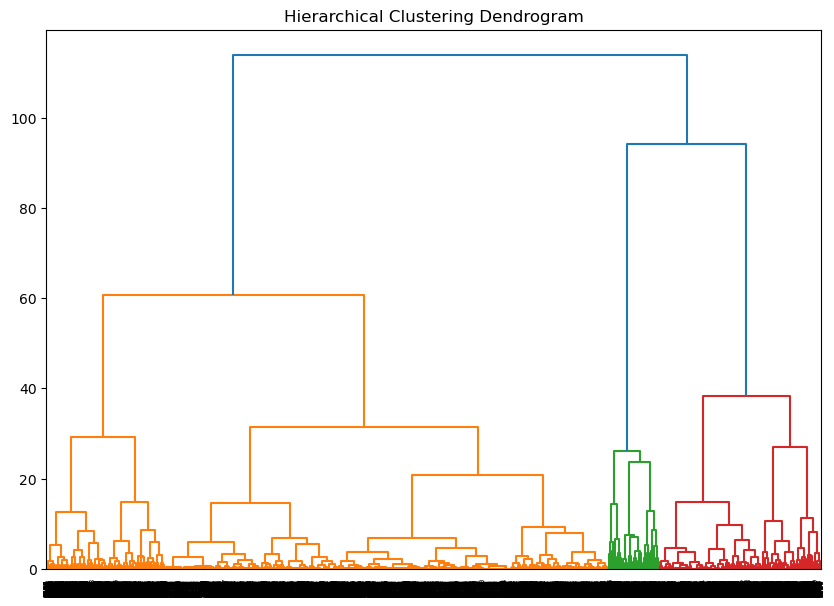

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Select the features for clustering
X = df[['PURCHASES', 'CREDIT_LIMIT']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


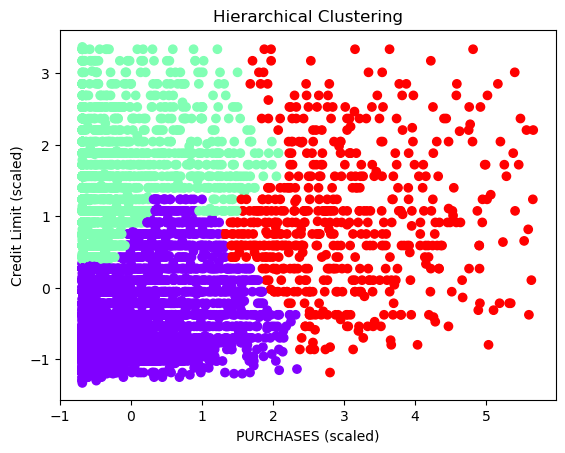

In [37]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_hc = hc.fit_predict(X_scaled)

# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_hc, cmap='rainbow')
plt.xlabel('PURCHASES (scaled)')
plt.ylabel('Credit Limit (scaled)')
plt.title('Hierarchical Clustering')
plt.show()


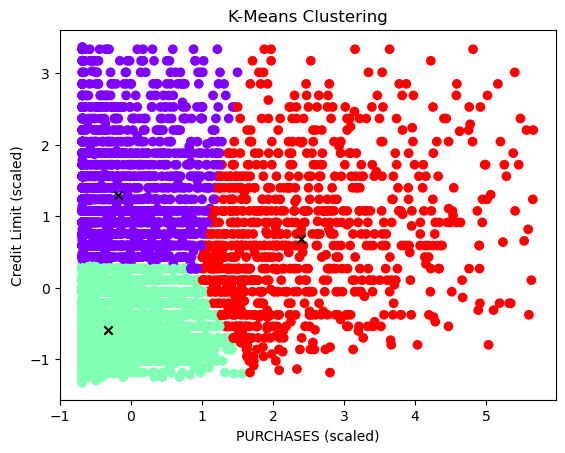

In [38]:
from sklearn.cluster import KMeans

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmeans, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x')  # Cluster centers
plt.xlabel('PURCHASES (scaled)')
plt.ylabel('Credit Limit (scaled)')
plt.title('K-Means Clustering')
plt.show()


In [44]:
wcss 

[17329.999999999938,
 9693.096081816537,
 5528.28830373277,
 4485.943904149795,
 3348.9132772737426,
 2824.3851180014844,
 2470.915468355093,
 2142.5139804028577,
 1882.7709612359436,
 1722.977579720365]

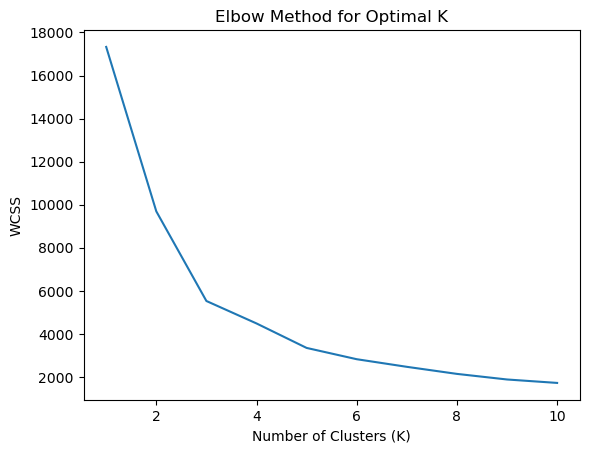

In [39]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


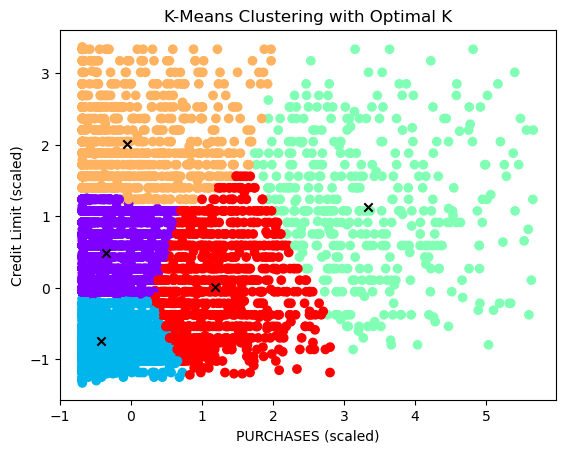

In [43]:
# Assuming 4 clusters is the optimal number based on the Elbow Method
kmeans_optimal = KMeans(n_clusters=5, random_state=42)
labels_kmeans_optimal = kmeans_optimal.fit_predict(X_scaled)

# Plot the optimal K clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmeans_optimal, cmap='rainbow')
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], color='black', marker='x')
plt.xlabel('PURCHASES (scaled)')
plt.ylabel('Credit Limit (scaled)')
plt.title('K-Means Clustering with Optimal K')
plt.show()


### Interpretation of Results

- Hierarchical Clustering: Based on the dendrogram and cluster plot, 
you can determine the inherent groupings of customers with respect to 'PURCHASES' and 'credit_limit'. 
Look at the cluster distribution to see whether customers with high purchases and high credit limits fall into specific clusters.

- K-Means Clustering: After determining the optimal number of clusters using the Elbow method, 
you can interpret the cluster centroids and the spread of the clusters. 
For example, customers with similar purchasing behavior and credit limits are grouped together.